# Kelompok 1
- Ichsan Rivaldi	2006568720
- Carles Octavianus	2006568613
- Kezya Samantha	1906296280
- Muftiarah Usman	1906296305


# Nomor 1. 
Buat program Mesin State Hingga berdasarkan Diagram Transisi sbb:

![](nomor-1-diagram.png)

In [34]:
# Program FSM untuk penjumlahan biner
# adjency list [(node, [(label, newnode, output), ...])] for binary addition
# nvm better use lookup table

lookup_tabel = {
    "N": {
        "00": ("N", "0"),
        "01": ("N", "1"),
        "10": ("N", "1"),
        "11": ("C", "0"),
    },
    "C": {
        "00": ("N", "1"),
        "01": ("C", "0"),
        "10": ("C", "0"),
        "11": ("C", "1"),
    },
}


def binary_addition(a: str, b: str):
    try:
        int(a, 2)
        int(b, 2)
    except ValueError:
        raise ValueError("Input must be binary")

    if "0b" in a:
        a = a[2:]
    if "0b" in b:
        b = b[2:]

    max_len = max(len(a), len(b))
    a = a.zfill(max_len)
    b = b.zfill(max_len)

    a = a[::-1]
    b = b[::-1]

    state = "N"
    sum = ""
    for x, y in zip(a, b):
        concat = f"{x}{y}"
        state, output = lookup_tabel[state][concat]
        sum += output

    if state == "C":
        sum += "1"
    sum = sum[::-1]

    return sum


if __name__ == "__main__":
    a = "1010000111001011"
    b = "10110001001"
    my_bin = binary_addition(a, b)
    print(f"==>> my_bin: {my_bin}")

    built_in_bin = bin((int(a, 2) + int(b, 2)))
    print(f"==>> built_in_bin: {built_in_bin}")

    assert my_bin == built_in_bin[2:]


==>> my_bin: 1010011101010100
==>> built_in_bin: 0b1010011101010100


In [8]:
# FSM penjumlahan biner menggunakan class

class BinaryAdderStateMachine:
    def __init__(self):
        self.state = 'N'
        self.result = ''

    def transition(self, current_state, input_bit1, input_bit2):
        if current_state == 'N':
            if input_bit1 == '0' and input_bit2 == '0':
                self.state = 'N'
                self.result = '0' + self.result
            elif (input_bit1 == '0' and input_bit2 == '1') or (input_bit1 == '1' and input_bit2 == '0'):
                self.state = 'N'
                self.result = '1' + self.result
            elif input_bit1 == '1' and input_bit2 == '1':
                self.state = 'C'
                self.result = '0' + self.result
        elif current_state == 'C':
            if input_bit1 == '0' and input_bit2 == '0':
                self.state = 'N'
                self.result = '1' + self.result
            elif (input_bit1 == '0' and input_bit2 == '1') or (input_bit1 == '1' and input_bit2 == '0'):
                self.state = 'C'
                self.result = '0' + self.result
            elif input_bit1 == '1' and input_bit2 == '1':
                self.state = 'C'
                self.result = '1' + self.result

    def process_input(self, input_binary1, input_binary2):
        # Pad input dengan 0 pada bagian depan hingga menjadi sama panjang
        max_len = max(len(input_binary1), len(input_binary2))
        input_binary1 = input_binary1.zfill(max_len)
        input_binary2 = input_binary2.zfill(max_len)

        for i in range(max_len - 1, -1, -1):
            input_bit1 = input_binary1[i]
            input_bit2 = input_binary2[i]
            self.transition(self.state, input_bit1, input_bit2)

        if self.state == 'C':
            self.result = '1' + self.result
            self.state = 'N'

        return self.result


if __name__ == "__main__":
    binary_adder = BinaryAdderStateMachine()
    input_binary1 = "101101"
    input_binary2 = "1011"
    result = binary_adder.process_input(input_binary1, input_binary2)
    print("Binary Input 1:", input_binary1)
    print("Binary Input 2:", input_binary2)
    print("Sum:", result)


Binary Input 1: 101101
Binary Input 2: 1011
Sum: 111000


# Nomor 2.

Buat Program Vending Machine yang pernah Anda ketahui dimana mesin tersebut
dapat menerima sejumlah uang dan input permintaan customer terkait produk yang
disajikan dengan keluaran produk yang diinginkan customer dan/atau uang
kembalian (jika ada).

Vending machine yang akan dibuat:
- input: 1, E (kembalian), snack bar, air mineral, soft drink, chips
- output: n (no output), 1, 2, 3, 4, 5, snack bar, air mineral, soft drink, chips
- harga snack bar: 3 koin, air mineral: 2 koin, soft drink: 4 koin, chips: 5 koin
- maximum koin: 5 koin (state 5)

berikut adalah diagram transisi dari mesin vending machine yang akan dibuat:
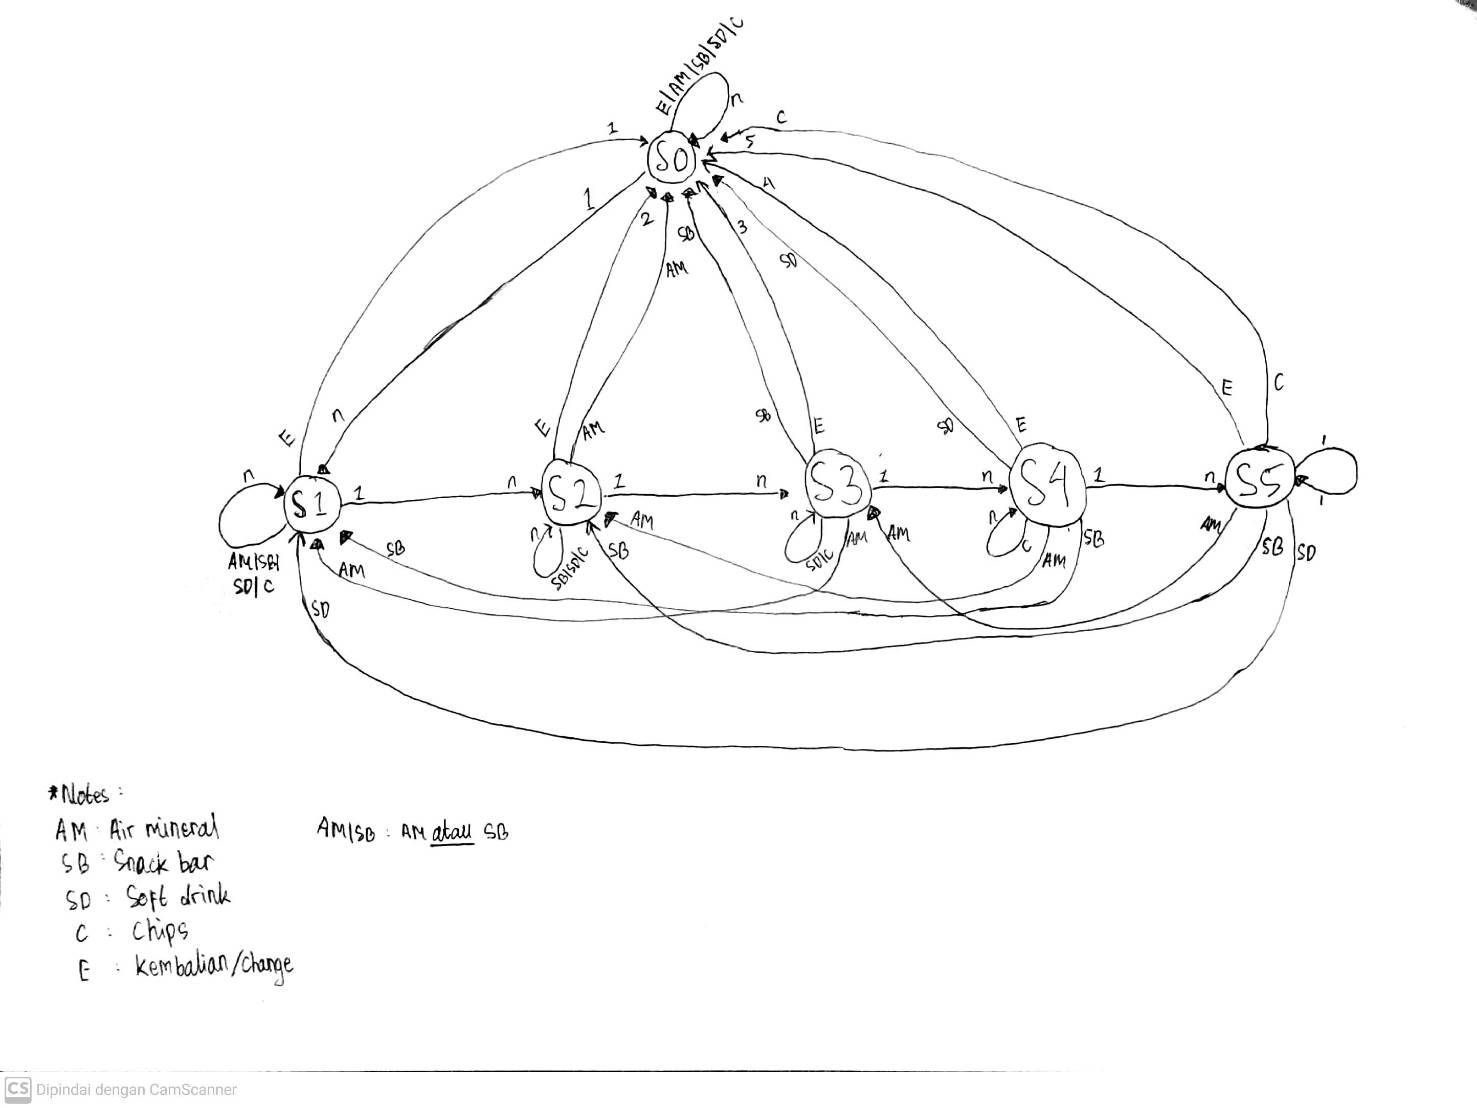

In [43]:
# FSM untuk vending machine sederhana
from typing import Iterable, Union
import pandas as pd

lookup_table = {
    # state : {input : (new_state, output)}
    # s0: state when there's no coin yet
    # s1: state when there's 1 coin already
    # s2: state when there's 2 coins already
    # s3: state when there's 3 coins already
    # s4: state when there's 4 coins already
    # s5: state when there's 5 coins already
    # input: 1, E (kembalian), snack bar, air mineral, soft drink, chips
    # output: n (no output), 1, 2, 3, 4, 5, snack bar, air mineral, soft drink, chips
    # harga snack bar: 3 koin, air mineral: 2 koin, soft drink: 4 koin, chips: 5 koin
    "S0": {
        1: ("S1", "n"),
        "E": ("S0", "n"),
        "snack bar": ("S0", "n"),
        "air mineral": ("S0", "n"),
        "soft drink": ("S0", "n"),
        "chips": ("S0", "n")
    },
    "S1": {
        1: ("S2", "n"),
        "E": ("S0", 1),
        "snack bar": ("S1", "n"),
        "air mineral": ("S1", "n"),
        "soft drink": ("S1", "n"),
        "chips": ("S1", "n")
    },
    "S2": {
        1: ("S3", "n"),
        "E": ("S0", 2),
        "snack bar": ("S2", "n"),
        "air mineral": ("S0", "air mineral"),
        "soft drink": ("S2", "n"),
        "chips": ("S2", "n")
    },
    "S3": {
        1: ("S4", "n"),
        "E": ("S0", 3),
        "snack bar": ("S0", "snack bar"),
        "air mineral": ("S1", "air mineral"),
        "soft drink": ("S3", "n"),
        "chips": ("S3", "n")
    },
    "S4": {
        1: ("S5", "n"),
        "E": ("S0", 4),
        "snack bar": ("S1", "snack bar"),
        "air mineral": ("S2", "air mineral"),
        "soft drink": ("S0", "soft drink"),
        "chips": ("S4", "n")
    },
    "S5": {
        1: ("S5", 1),
        "E": ("S0", 5),
        "snack bar": ("S2", "snack bar"),
        "air mineral": ("S3", "air mineral"),
        "soft drink": ("S1", "soft drink"),
        "chips": ("S0", "chips")
    },
}


def vending_machine(inputs: Iterable[Union[str, int]]) -> Iterable[Union[str, int]]:
    state = "S0"
    for input in inputs:
        state, output = lookup_table[state][input]
        yield output

def print_table(lookup_table):
    df = pd.DataFrame(lookup_table)
    print(df)


if __name__ == "__main__":
    inputs = [1, 1, 1, "E", 1, 1, 1, 1, "air mineral", 1, "snack bar", "E"]
    print(f"==>> inputs: {inputs}")
    outputs = vending_machine(inputs)
    print(f"==>> outputs: {list(outputs)}")
    


==>> inputs: [1, 1, 1, 'E', 1, 1, 1, 1, 'air mineral', 1, 'snack bar', 'E']
==>> outputs: ['n', 'n', 'n', 3, 'n', 'n', 'n', 'n', 'air mineral', 'n', 'snack bar', 'n']


In [44]:
# lookup table with pandas
print_table(lookup_table)

                  S0       S1                 S2                 S3  \
1            (S1, n)  (S2, n)            (S3, n)            (S4, n)   
E            (S0, n)  (S0, 1)            (S0, 2)            (S0, 3)   
snack bar    (S0, n)  (S1, n)            (S2, n)    (S0, snack bar)   
air mineral  (S0, n)  (S1, n)  (S0, air mineral)  (S1, air mineral)   
soft drink   (S0, n)  (S1, n)            (S2, n)            (S3, n)   
chips        (S0, n)  (S1, n)            (S2, n)            (S3, n)   

                            S4                 S5  
1                      (S5, n)            (S5, 1)  
E                      (S0, 4)            (S0, 5)  
snack bar      (S1, snack bar)    (S2, snack bar)  
air mineral  (S2, air mineral)  (S3, air mineral)  
soft drink    (S0, soft drink)   (S1, soft drink)  
chips                  (S4, n)        (S0, chips)  


# Extra: program vending machine generalize


In [49]:
from typing import Iterable, Union
from dataclasses import dataclass
from collections import OrderedDict
import json
import pandas as pd


class LookupTable:
    def __init__(
        self,
        max_money: int,
        possible_money: Iterable[int],
        possible_products: Iterable[tuple[str, int]],
    ):
        """
        Args:
            max_money (int): maximum money that can be inserted
            possible_money (Iterable[int]): possible money that can be inserted
            possible_products (Iterable[tuple[str, int]]): possible products that can be bought
        """

        self.max_money = max_money
        self.possible_money = possible_money
        self.possible_products = possible_products
        self.table = self._generate_lookup_table()

    def _generate_lookup_table(self):
        """
        A function to generate lookup table for vending machine
        """
        lookup_table = OrderedDict()

        for i in range(self.max_money):
            lookup_table[f"S{i}"] = OrderedDict()
            for money in self.possible_money:
                if i + money <= self.max_money:
                    lookup_table[f"S{i}"][money] = (f"S{i+money}", "n")
                else:
                    lookup_table[f"S{i}"][money] = (
                        f"S{self.max_money}",
                        f"{self.max_money - i}",
                    )

            for product in self.possible_products:
                if i >= product[1]:
                    lookup_table[f"S{i}"][product[0]] = (f"S{i-product[1]}", product[0])
                else:
                    lookup_table[f"S{i}"][product[0]] = (
                        f"S{i}",
                        f"n",
                    )

            lookup_table[f"S{i}"]["END"] = ("S0", f"{i}")

        lookup_table[f"S{self.max_money}"] = OrderedDict()
        for money in self.possible_money:
            lookup_table[f"S{self.max_money}"][money] = (
                f"S{self.max_money}",
                f"{money}",
            )
        for product in self.possible_products:
            lookup_table[f"S{self.max_money}"][product[0]] = (
                f"S{self.max_money - product[1]}",
                f"{product[0]}",
            )

        lookup_table[f"S{self.max_money}"]["END"] = (
            "S0",
            f"{self.max_money}",
        )

        return lookup_table

    def print_table(
        self,
    ):
        self.df = pd.DataFrame.from_dict(self.table, orient="index")
        print(self.df)

    def print_graph(self):
        raise NotImplementedError
        # not working :D
        # self.G = nx.DiGraph()
        # for state in self.table:
        #     self.G.add_node(state)
        #     for input in self.table[state]:
        #         self.G.add_edge(state, self.table[state][input][0], input=input)

        # nx.draw(self.G, with_labels=True, font_weight="bold")


def vending_machine(
    inputs: Iterable[Union[str, int]], lookup_table: LookupTable
) -> Iterable[Union[str, int]]:
    """
    vending machine function

    Args:
        inputs (Iterable[Union[str, int]]): iterable of inputs
        lookup_table (LookupTable): lookup table for vending machine
    """
    state = "S0"
    for input in inputs:
        state, output = lookup_table.table[state][input]
        yield state, output


if __name__ == "__main__":
    max_money = 30
    possible_money = [5, 10, 25]
    possible_products = [("A", 10), ("B", 15), ("C", 25)]
    lookup_table = LookupTable(max_money, possible_money, possible_products)

    # with open("lookup_table.json", "w") as f:
    #     json.dump(lookup_table.table, f)

    inputs = [
        25,
        25,
        10,
        25,
        25,
        25,
        5,
        10,
        "A",
        "A",
        "A",
        "C",
        10,
        "C",
        "C",
        "C",
        10,
        25,
        "END",
    ]

    print(f"==>> inputs: {inputs}")
    print(
        f"==>> state/output: {list(vending_machine(inputs, lookup_table))}"
    )


==>> inputs: [25, 25, 10, 25, 25, 25, 5, 10, 'A', 'A', 'A', 'C', 10, 'C', 'C', 'C', 10, 25, 'END']
==>> state/output: [('S25', 'n'), ('S30', '5'), ('S30', '10'), ('S30', '25'), ('S30', '25'), ('S30', '25'), ('S30', '5'), ('S30', '10'), ('S20', 'A'), ('S10', 'A'), ('S0', 'A'), ('S0', 'n'), ('S10', 'n'), ('S10', 'n'), ('S10', 'n'), ('S10', 'n'), ('S20', 'n'), ('S30', '10'), ('S0', '30')]


In [50]:
lookup_table.print_table()

            5         10         25         A         B         C       END
S0    (S5, n)   (S10, n)   (S25, n)   (S0, n)   (S0, n)   (S0, n)   (S0, 0)
S1    (S6, n)   (S11, n)   (S26, n)   (S1, n)   (S1, n)   (S1, n)   (S0, 1)
S2    (S7, n)   (S12, n)   (S27, n)   (S2, n)   (S2, n)   (S2, n)   (S0, 2)
S3    (S8, n)   (S13, n)   (S28, n)   (S3, n)   (S3, n)   (S3, n)   (S0, 3)
S4    (S9, n)   (S14, n)   (S29, n)   (S4, n)   (S4, n)   (S4, n)   (S0, 4)
S5   (S10, n)   (S15, n)   (S30, n)   (S5, n)   (S5, n)   (S5, n)   (S0, 5)
S6   (S11, n)   (S16, n)  (S30, 24)   (S6, n)   (S6, n)   (S6, n)   (S0, 6)
S7   (S12, n)   (S17, n)  (S30, 23)   (S7, n)   (S7, n)   (S7, n)   (S0, 7)
S8   (S13, n)   (S18, n)  (S30, 22)   (S8, n)   (S8, n)   (S8, n)   (S0, 8)
S9   (S14, n)   (S19, n)  (S30, 21)   (S9, n)   (S9, n)   (S9, n)   (S0, 9)
S10  (S15, n)   (S20, n)  (S30, 20)   (S0, A)  (S10, n)  (S10, n)  (S0, 10)
S11  (S16, n)   (S21, n)  (S30, 19)   (S1, A)  (S11, n)  (S11, n)  (S0, 11)
S12  (S17, n